# Machine Learning Logistic Regression

In [1]:
# First we will import all the important libreary to use
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
# now we will load the data file(you can download this file from Kaggle)
a=pd.read_csv(r"C:\Users\arpitshrivastav.vc\Downloads\loan.csv")
a

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,No,0,1,No,5849,0.0,NaN,360.0,1.0,Urban,Yes
1,LP001003,1.0,Yes,1,1,No,4583,1508.0,128.0,360.0,1.0,Rural,No
2,LP001005,1.0,Yes,0,1,Yes,3000,0.0,66.0,360.0,1.0,Urban,Yes
3,LP001006,1.0,Yes,0,0,No,2583,2358.0,120.0,360.0,1.0,Urban,Yes
4,LP001008,1.0,No,0,1,No,6000,0.0,141.0,360.0,1.0,Urban,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,No,0,1,No,2900,0.0,71.0,360.0,1.0,Rural,Yes
610,LP002979,1.0,Yes,3+,1,No,4106,0.0,40.0,180.0,1.0,Rural,Yes
611,LP002983,1.0,Yes,1,1,No,8072,240.0,253.0,360.0,1.0,Urban,Yes
612,LP002984,1.0,Yes,2,1,No,7583,0.0,187.0,360.0,1.0,Urban,Yes


In [3]:
# now lets see the top 10 Rows of the dataset
a.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,No,0,1,No,5849,0.0,NaN,360.0,1.0,Urban,Yes
1,LP001003,1.0,Yes,1,1,No,4583,1508.0,128.0,360.0,1.0,Rural,No
2,LP001005,1.0,Yes,0,1,Yes,3000,0.0,66.0,360.0,1.0,Urban,Yes
3,LP001006,1.0,Yes,0,0,No,2583,2358.0,120.0,360.0,1.0,Urban,Yes
4,LP001008,1.0,No,0,1,No,6000,0.0,141.0,360.0,1.0,Urban,Yes
5,LP001011,1.0,Yes,2,1,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Yes
6,LP001013,1.0,Yes,0,0,No,2333,1516.0,95.0,360.0,1.0,Urban,Yes
7,LP001014,1.0,Yes,3+,1,No,3036,2504.0,158.0,360.0,0.0,Semiurban,No
8,LP001018,1.0,Yes,2,1,No,4006,1526.0,168.0,360.0,1.0,Urban,Yes
9,LP001020,1.0,Yes,1,1,No,12841,10968.0,349.0,360.0,1.0,Semiurban,No


In [4]:
# lets check the shape
a.shape # 614 rows and 13 columns

(614, 13)

In [5]:
# now lets try to understand our data set 
a.describe()

,Gender,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,601.000000,614.000000,614.000000,614.000000,592.000000,600.00000,564.000000
mean,0.813644,0.781759,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,0.389718,0.413389,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,0.000000,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000
25%,1.000000,1.000000,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,1.000000,1.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,1.000000,1.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
# check for the null values in our dataset
a.isnull().sum() 
# in these columns we are getting the null values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# we either have to fill these null values or remove these from our data set otherwise our prediction model will not work
# properly, so i am filling all the null vlaues with the mean values with respect to their columns.
a.fillna({"Gender":1.0,"Married":"No","Dependents":0,"Self_Employed":"No","LoanAmount":146.4,"Loan_Amount_Term":342.0,"Credit_History":1.0},inplace=True)
a.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

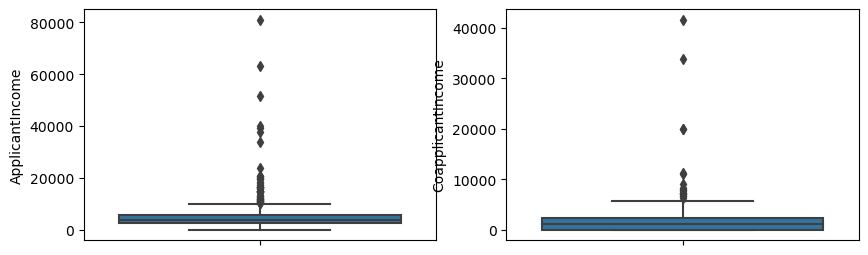

In [8]:
# now bu using the boxplot lets check for the outliers
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.boxplot(y=a["ApplicantIncome"])

plt.subplot(1,2,2)
sns.boxplot(y=a["CoapplicantIncome"])

plt.show()

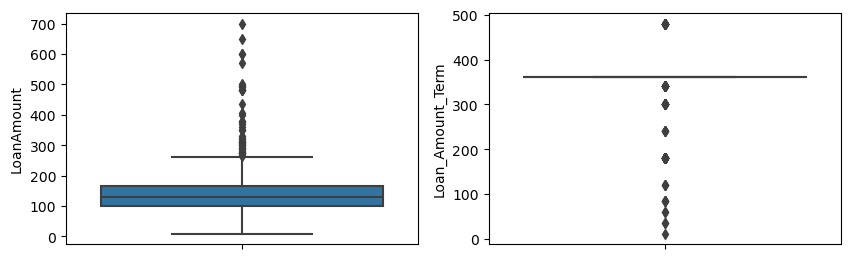

In [9]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.boxplot(y=a["LoanAmount"])

plt.subplot(1,2,2)
sns.boxplot(y=a["Loan_Amount_Term"])

plt.show()

In [10]:
# Now we will be removing the outliers using IQR 
Q1,Q3=a["ApplicantIncome"].quantile([.25,.75])
IQR=Q3-Q1
LL=Q1-1.5*(IQR) # Lower Limit
UL=Q3+1.5*(IQR) # Upper Limit

In [11]:
UL # this is the upper limit for ApplicationIncome

10171.25

In [12]:
# now lets check how many outlier we are having in our data set 
outliers= a[a["ApplicantIncome"]>UL]
outliers

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
9,LP001020,1.0,Yes,1,1,No,12841,10968.0,349.0,360.0,1.0,Semiurban,No
34,LP001100,1.0,No,3+,1,No,12500,3000.0,320.0,360.0,1.0,Rural,No
54,LP001186,0.0,Yes,1,1,Yes,11500,0.0,286.0,360.0,0.0,Urban,No
67,LP001233,1.0,Yes,1,1,No,10750,0.0,312.0,360.0,1.0,Urban,Yes
102,LP001350,1.0,Yes,0,1,No,13650,0.0,146.4,360.0,1.0,Urban,Yes
106,LP001369,1.0,Yes,2,1,No,11417,1126.0,225.0,360.0,1.0,Urban,Yes
115,LP001401,1.0,Yes,1,1,No,14583,0.0,185.0,180.0,1.0,Rural,Yes
119,LP001422,0.0,No,0,1,No,10408,0.0,259.0,360.0,1.0,Urban,Yes
126,LP001448,1.0,Yes,3+,1,No,23803,0.0,370.0,360.0,1.0,Rural,Yes
128,LP001451,1.0,Yes,1,1,Yes,10513,3850.0,160.0,180.0,0.0,Urban,No


In [13]:
# now i will convert all the outlier with the upper Limit for applictaion income
a["ApplicantIncome"]=np.where(a["ApplicantIncome"]>UL,UL,a["ApplicantIncome"])

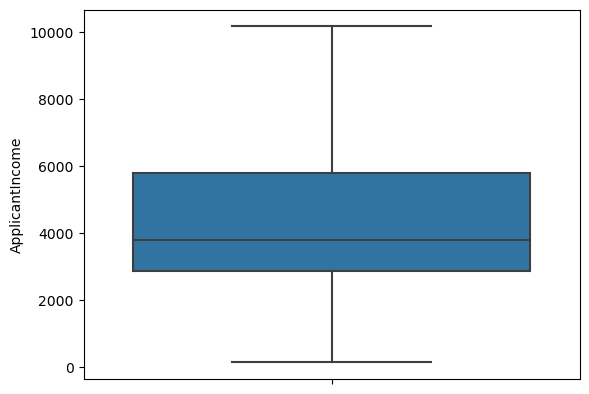

In [14]:
sns.boxplot(y=a["ApplicantIncome"])
plt.show()
# Here we can see that all the outliers are removed

In [15]:
# removing the outliers for CoapplicantIncome
Q1,Q3=a["CoapplicantIncome"].quantile([.25,.75])
IQR=Q3-Q1
LL=Q1-1.5*(IQR)
UL=Q3+1.5*(IQR)

In [16]:
UL

5743.125

In [17]:
a["CoapplicantIncome"]=np.where(a["CoapplicantIncome"]>UL,UL,a["CoapplicantIncome"])

<Axes: ylabel='CoapplicantIncome'>

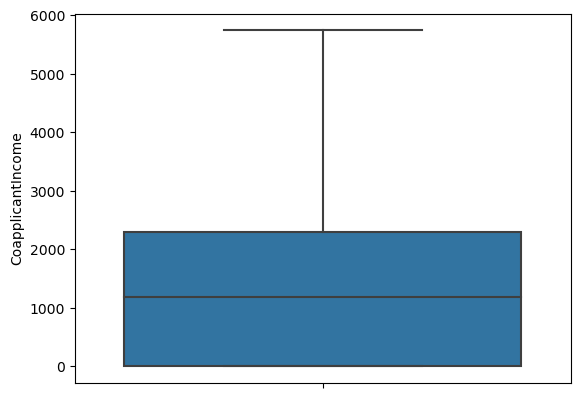

In [18]:
sns.boxplot(y=a["CoapplicantIncome"])

In [19]:
# Removing the outliers for LoanAmount
Q1,Q3=a["LoanAmount"].quantile([.25,.75])
IQR=Q3-Q1
LL=Q1-1.5*(IQR)
UL=Q1+1.5*(IQR)

In [20]:
UL

197.0

In [21]:
a["LoanAmount"]=np.where(a["LoanAmount"]>UL,UL,a["LoanAmount"])

<Axes: ylabel='LoanAmount'>

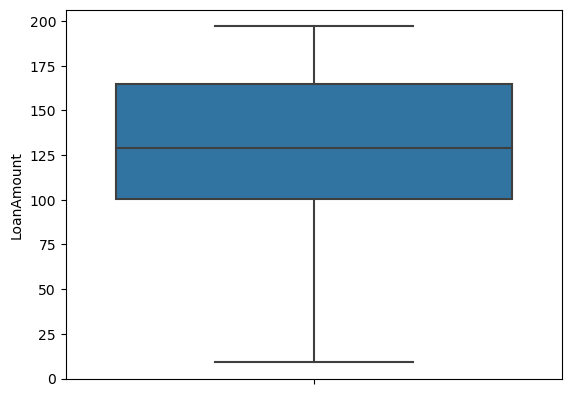

In [22]:
sns.boxplot(y=a["LoanAmount"])

<Axes: ylabel='Loan_Amount_Term'>

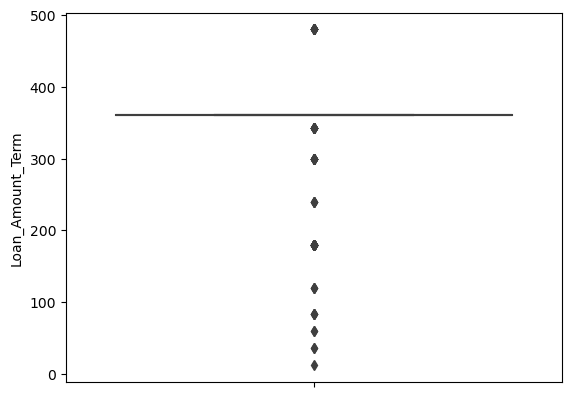

In [23]:
sns.boxplot(y=a["Loan_Amount_Term"])

In [25]:
a["Loan_Amount_Term"]=np.where(a["Loan_Amount_Term"]>UL,UL,a["Loan_Amount_Term"])

<Axes: ylabel='Loan_Amount_Term'>

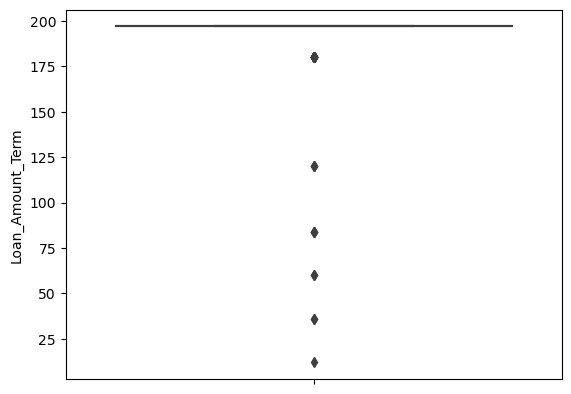

In [26]:
sns.boxplot(y=a["Loan_Amount_Term"])

In [27]:
a["Loan_Amount_Term"]=np.where(a["Loan_Amount_Term"]<LL,LL,a["Loan_Amount_Term"])

<Axes: ylabel='Loan_Amount_Term'>

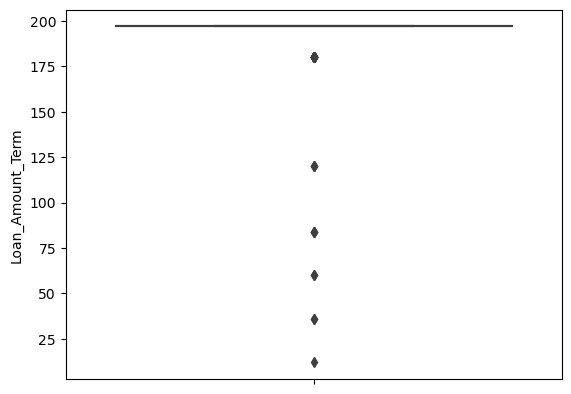

In [28]:
sns.boxplot(y=a["Loan_Amount_Term"])

In [29]:
# Now lets see the data
a.describe()

,Gender,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.781759,4617.111564,1419.702231,131.434528,193.397394,0.855049
std,0.386497,0.413389,2479.851729,1624.605892,43.633233,17.936586,0.352339
min,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,1.000000,1.000000,2877.500000,0.000000,100.250000,197.000000,1.000000
50%,1.000000,1.000000,3812.500000,1188.500000,129.000000,197.000000,1.000000
75%,1.000000,1.000000,5795.000000,2297.250000,164.750000,197.000000,1.000000
max,1.000000,1.000000,10171.250000,5743.125000,197.000000,197.000000,1.000000


In [30]:
# now lets see the count of Educated employess
a["Education"].value_counts()

Education
1    480
0    134
Name: count, dtype: int64

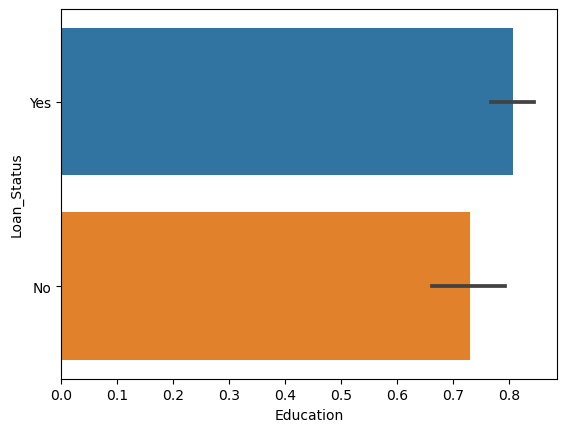

In [31]:
# as we can see education is not a big factor in giving the loan
sns.barplot(x=a["Education"],y=a["Loan_Status"])
plt.show()

<Axes: xlabel='Education', ylabel='LoanAmount'>

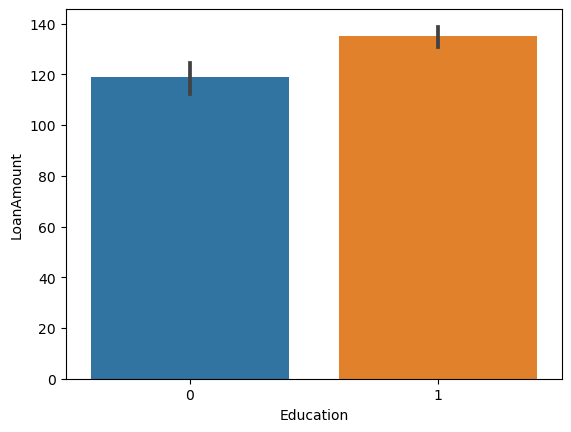

In [32]:
# now lets check the amount for educated persons
sns.barplot(x=a["Education"],y=a["LoanAmount"])

In [33]:
a.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,No,0,1,No,5849.0,0.0,146.4,197.0,1.0,Urban,Yes
1,LP001003,1.0,Yes,1,1,No,4583.0,1508.0,128.0,197.0,1.0,Rural,No
2,LP001005,1.0,Yes,0,1,Yes,3000.0,0.0,66.0,197.0,1.0,Urban,Yes
3,LP001006,1.0,Yes,0,0,No,2583.0,2358.0,120.0,197.0,1.0,Urban,Yes
4,LP001008,1.0,No,0,1,No,6000.0,0.0,141.0,197.0,1.0,Urban,Yes


In [34]:
# now lets convert the values into 1 or 0
a.replace(to_replace={"Yes":1,"No":0,"Y":1,"N":0},inplace=True)
a.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0,0,1,0,5849.0,0.0,146.4,197.0,1.0,Urban,1
1,LP001003,1.0,1,1,1,0,4583.0,1508.0,128.0,197.0,1.0,Rural,0
2,LP001005,1.0,1,0,1,1,3000.0,0.0,66.0,197.0,1.0,Urban,1
3,LP001006,1.0,1,0,0,0,2583.0,2358.0,120.0,197.0,1.0,Urban,1
4,LP001008,1.0,0,0,1,0,6000.0,0.0,141.0,197.0,1.0,Urban,1


In [35]:
b=a[["Gender","Married","Dependents","Education","Self_Employed","ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History","Loan_Status"]]
b.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1.0,0,0,1,0,5849.00,0.000,146.4,197.0,1.0,1
1,1.0,1,1,1,0,4583.00,1508.000,128.0,197.0,1.0,0
2,1.0,1,0,1,1,3000.00,0.000,66.0,197.0,1.0,1
3,1.0,1,0,0,0,2583.00,2358.000,120.0,197.0,1.0,1
4,1.0,0,0,1,0,6000.00,0.000,141.0,197.0,1.0,1
5,1.0,1,2,1,1,5417.00,4196.000,197.0,197.0,1.0,1
6,1.0,1,0,0,0,2333.00,1516.000,95.0,197.0,1.0,1
7,1.0,1,3+,1,0,3036.00,2504.000,158.0,197.0,0.0,0
8,1.0,1,2,1,0,4006.00,1526.000,168.0,197.0,1.0,1
9,1.0,1,1,1,0,10171.25,5743.125,197.0,197.0,1.0,0


In [37]:
# now lets split our data using train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, stratify=y)

print(x_train.shape) #80% of the data
print(y_train.shape) #20% of the data

(491, 10)
(491, 1)


In [45]:
x_train["Dependents"]=np.where(x_train["Dependents"]=="3+",4,x_train["Dependents"])
x_test["Dependents"]=np.where(x_test["Dependents"]=="3+",4,x_test["Dependents"])

In [39]:
y_train

,Loan_Status
403,1
439,1
111,1
426,0
259,0
...,...
49,1
293,0
370,1
36,0


In [49]:
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Assuming x_train and y_train are properly defined DataFrame or Series objects
# For example:
# x_train = pd.DataFrame(...)
# y_train = pd.Series(...)

# Initialize the Logistic Regression model
lr = LogisticRegression()

# Fit the model to the training data
lr.fit(x_train, y_train)


LogisticRegression()

In [50]:
# lets predict for our test data
predict=lr.predict(x_test)
predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [51]:
lr.score(x_test,y_test)
# Here we can see that our model has 82% of Accuracy

0.8211382113821138